In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

In [4]:
data = pd.read_csv('C:\\Users\\User\\OneDrive\\Documents\\Elysian\\diabetes.csv')

In [5]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Axes: >

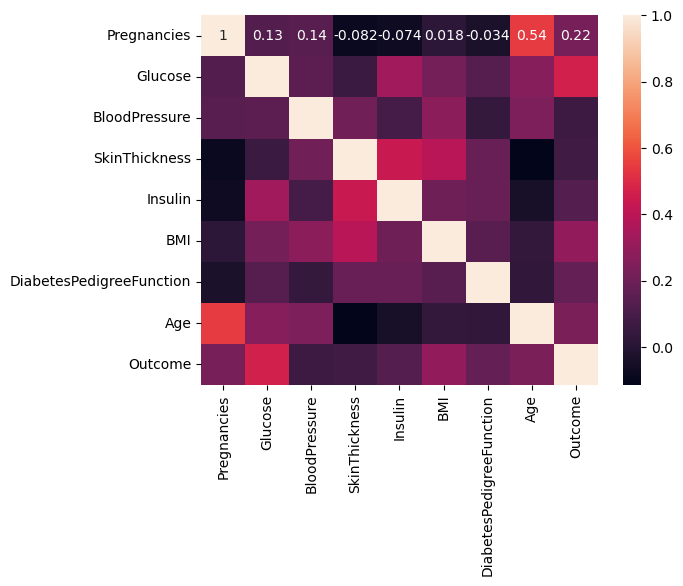

In [7]:
sns.heatmap(data.corr(), annot=True, cbar=True)

<Axes: >

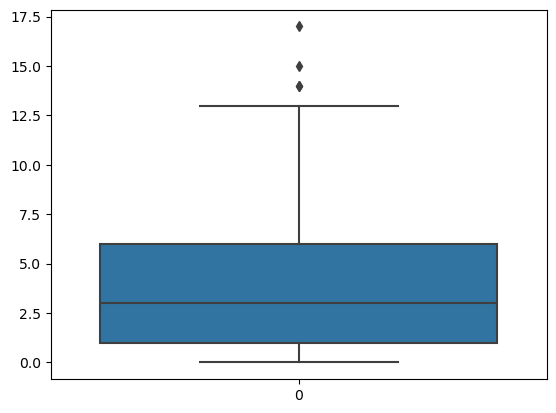

In [8]:
sns.boxplot(data['Pregnancies'])

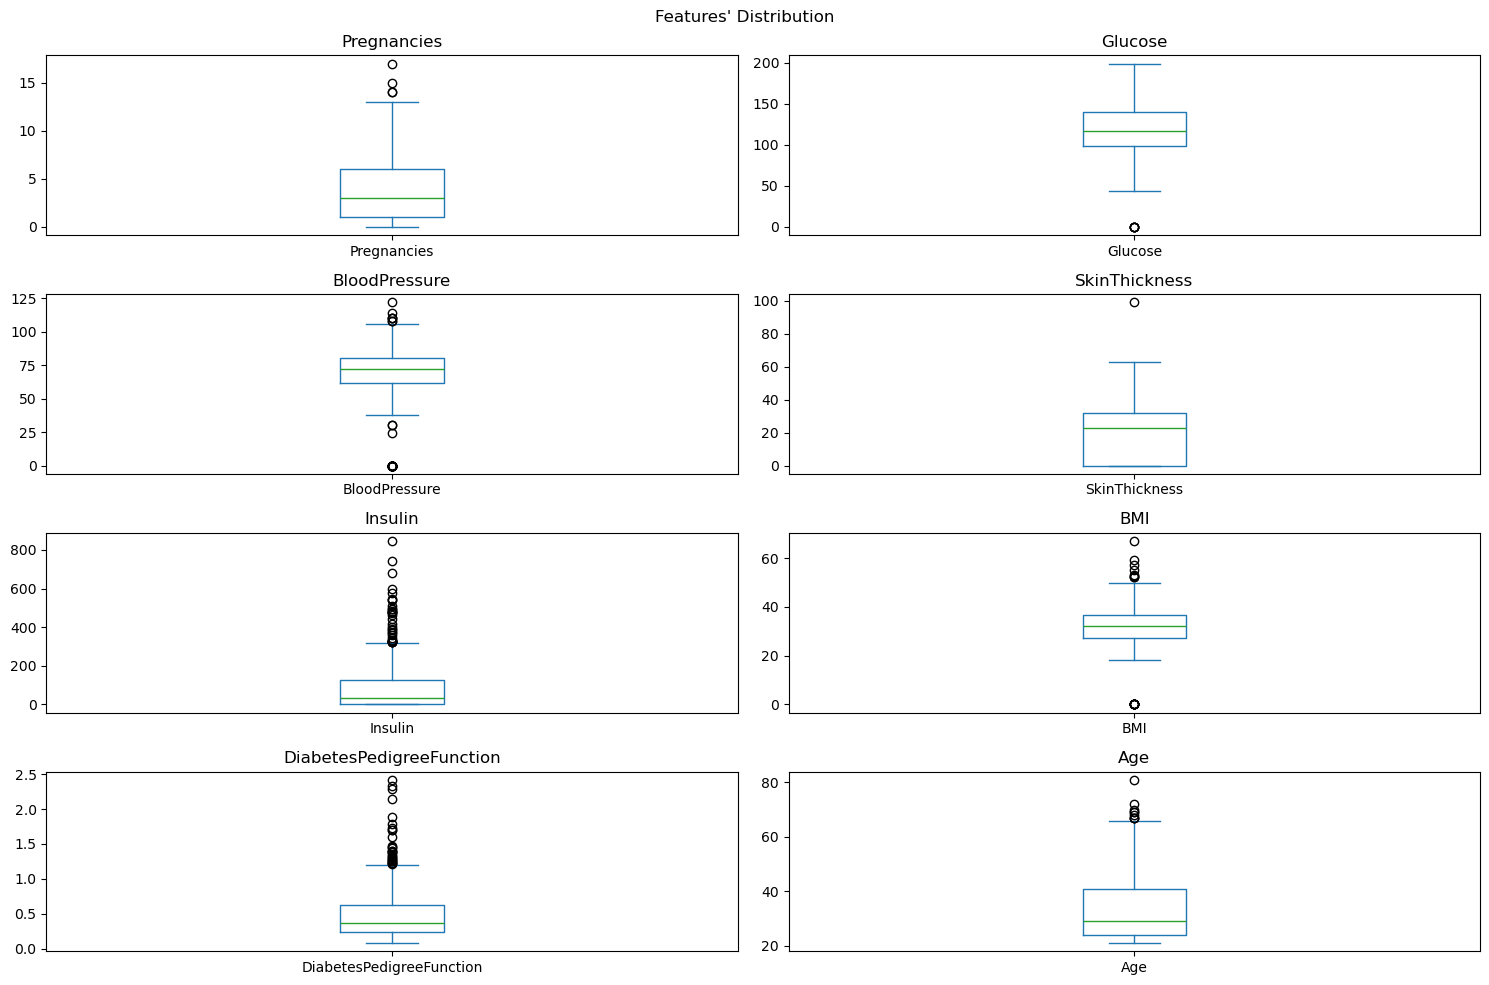

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = data.drop('Outcome', axis = 1).columns
for col in columns:
    data[col].plot(kind = 'box', ax = axes[ax_idx], title = col)
    ax_idx += 1

plt.suptitle('Features\' Distribution')
plt.tight_layout()
plt.show()

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

df = data[~((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR)))]

In [11]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                       0.351  31.0        0  
2                       0.672  32.0        1  
3                       0.167  21.0        0  
4                         NaN  33.0        1  
..                        ...   ...      ...  
763                     0.171  63.0        0  
764                     0.340  27.0        0  
765                     0.245  30.0        0  
766                     0.349  47.0        1  
767                     0.315  23.0        0  

[768 rows x 9 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             723 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   734 non-null    float64
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       759 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [13]:
df = df.dropna()

In [14]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0            0.0      0.0  25.6   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                       0.351  31.0        0  
2                       0.672  32.0        1  
3                       0.167  21.0        0  
5                       0.201  30.0        0  
..                        ...   ...      ...  
763                     0.171  63.0        0  
764                     0.340  27.0        0  
765                     0.245  30.0        0  
766                     0.349  47.0        1  
767                     0.315  23.0        0  

[639 rows x 9 columns]

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
df_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [18]:
df_new

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.675325       0.500000       0.583333  0.000000  0.484277   
1       0.076923  0.266234       0.411765       0.483333  0.000000  0.264151   
2       0.615385  0.902597       0.382353       0.000000  0.000000  0.160377   
3       0.076923  0.292208       0.411765       0.383333  0.295597  0.311321   
4       0.384615  0.467532       0.529412       0.000000  0.000000  0.232704   
..           ...       ...            ...            ...       ...       ...   
634     0.769231  0.370130       0.558824       0.800000  0.566038  0.462264   
635     0.153846  0.506494       0.470588       0.450000  0.000000  0.584906   
636     0.384615  0.500000       0.500000       0.383333  0.352201  0.251572   
637     0.076923  0.532468       0.323529       0.000000  0.000000  0.374214   
638     0.076923  0.318182       0.470588       0.516667  0.000000  0.383648   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.493261  0.644444      1.0  
1                    0.245283  0.222222      0.0  
2                    0.533693  0.244444      1.0  
3                    0.079964  0.000000      0.0  
4                    0.110512  0.200000      0.0  
..                        ...       ...      ...  
634                  0.083558  0.933333      0.0  
635                  0.235400  0.133333      0.0  
636                  0.150045  0.200000      0.0  
637                  0.243486  0.577778      1.0  
638                  0.212938  0.044444      0.0  

[639 rows x 9 columns]

In [19]:
df_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
x = df_new[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [21]:
y = df_new['Outcome']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Regression

In [25]:
regressor = LogisticRegression()

In [26]:
regressor.fit(x_train, y_train)

LogisticRegression()

In [27]:
y1_pred = regressor.predict(x_test)

In [28]:
accuracy_score(y_test, y1_pred)

0.8203125

In [29]:
print(confusion_matrix(y_test, y1_pred))

[[88  4]
 [19 17]]


In [30]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88        92
         1.0       0.81      0.47      0.60        36

    accuracy                           0.82       128
   macro avg       0.82      0.71      0.74       128
weighted avg       0.82      0.82      0.80       128



Decision Tree

In [31]:
tree_clf = DecisionTreeClassifier(max_depth=1)

In [32]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [33]:
y2_pred = tree_clf.predict(x_test)

In [34]:
accuracy_score(y_test, y2_pred)

0.7890625

In [35]:
print(confusion_matrix(y_test, y2_pred))

[[86  6]
 [21 15]]


In [36]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86        92
         1.0       0.71      0.42      0.53        36

    accuracy                           0.79       128
   macro avg       0.76      0.68      0.70       128
weighted avg       0.78      0.79      0.77       128



Random Forest

In [37]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [38]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [39]:
y3_pred = rfc.predict(x_test)

In [40]:
accuracy_score(y_test, y3_pred)

0.8046875

In [41]:
print(confusion_matrix(y_test, y3_pred))

[[83  9]
 [16 20]]


In [42]:
print(classification_report(y_test, y3_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        92
         1.0       0.69      0.56      0.62        36

    accuracy                           0.80       128
   macro avg       0.76      0.73      0.74       128
weighted avg       0.80      0.80      0.80       128



In [43]:
pd.Series(rfc.feature_importances_, index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).sort_values(ascending=False)

Glucose                     0.263190
BMI                         0.166034
Age                         0.125741
DiabetesPedigreeFunction    0.123652
BloodPressure               0.086908
Pregnancies                 0.086609
Insulin                     0.078422
SkinThickness               0.069445
dtype: float64

In [44]:
x4 = df_new[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [45]:
y4 = df_new['Outcome']

In [46]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

In [47]:
rfc.fit(x4_train, y4_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
y4_pred = rfc.predict(x4_test)

In [49]:
accuracy_score(y4_test, y4_pred)

0.8046875

In [50]:
print(confusion_matrix(y4_test, y4_pred))

[[82 10]
 [15 21]]


In [51]:
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        92
         1.0       0.68      0.58      0.63        36

    accuracy                           0.80       128
   macro avg       0.76      0.74      0.75       128
weighted avg       0.80      0.80      0.80       128



In [52]:
pd.Series(rfc.feature_importances_, index=['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']).sort_values(ascending=False)

Glucose                     0.295396
BMI                         0.198107
DiabetesPedigreeFunction    0.162023
Age                         0.151600
BloodPressure               0.102164
Pregnancies                 0.090710
dtype: float64

In [53]:
x5 = df_new[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [54]:
y5 = df_new['Outcome']

In [55]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=42)

In [56]:
rfc.fit(x5_train, y5_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
y5_pred = rfc.predict(x5_test)

In [58]:
accuracy_score(y5_test, y5_pred)

0.796875

In [59]:
print(confusion_matrix(y5_test, y5_pred))

[[79 13]
 [13 23]]


In [60]:
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        92
         1.0       0.68      0.58      0.63        36

    accuracy                           0.80       128
   macro avg       0.76      0.74      0.75       128
weighted avg       0.80      0.80      0.80       128



Hyperparameter Tuning

In [61]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [62]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [50,100,200,150]
}

In [63]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [50, 100, 200, 150]},
             scoring='accuracy', verbose=1)

In [64]:
grid_search.best_score_

0.7787432332677166

In [65]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)